## Introduction About Unsupervised Machine Learning.

- Algorithms belonging to the family of **Unsupervised Learning have no variable to predict** tied to the data. Instead of having an output, the data only has an input which would be multiple variables that describe the data. This is where clustering comes in.

- **Clustering is one of the most common exploratory data analysis technique** used to get an intuition about the structure of the data. It can be defined as the task of **identifying subgroups** in the data such that data points in the **same subgroup (cluster) are very similar while data points in different clusters are very different.** In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a **similarity measure such as euclidean-based distance or correlation-based distance.** The decision of which similarity measure to use is application-specific.

- Clustering analysis can be done on the basis of features where we try to find subgroups of samples based on features or on the basis of samples where we try to find subgroups of features based on samples. We’ll cover here clustering based on features. Clustering is used in market segmentation; where we try to fined customers that are similar to each other whether in terms of behaviors or attributes, image segmentation/compression; where we try to group similar regions together, document clustering based on topics, etc.

- Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups.

- Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

# K-Means

- Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

- The way kmeans algorithm works is as follows:
    -  Specify number of clusters K.
    -  Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
    -  Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
    -  Compute the sum of the squared distance between data points and all centroids.
    -  Assign each data point to the closest cluster (centroid).
    - Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.



## Working Principle:-

 - The k-means clustering algorithm attempts to split a given anonymous data set (a set containing no information as to class identity) into a fixed number (k) of clusters.

 - Initially k number of so called centroids are chosen. A centroid is a data point (imaginary or real) at the center of a cluster. In Praat each centroid is an existing data point in the given input data set, picked at random, such that all centroids are unique (that is, for all centroids ci and cj, ci ≠ cj). These centroids are used to train a kNN classifier. 
 - The resulting classifier is used to classify (using k = 1) the data and thereby produce an initial randomized set of clusters. Each centroid is thereafter set to the arithmetic mean of the cluster it defines. The process of classification and centroid adjustment is repeated until the values of the centroids stabilize. The final centroids will be used to produce the final classification/clustering of the input data, effectively turning the set of initially anonymous data points into a set of data points, each with a class identity.

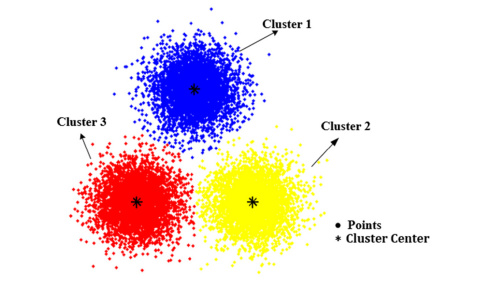

In [1]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/unnamed.jpg')

## Evaluation Methods

 - Contrary to supervised learning where we have the ground truth to evaluate the model’s performance, clustering analysis doesn’t have a solid evaluation metric that we can use to evaluate the outcome of different clustering algorithms. Moreover, since kmeans requires k as an input and doesn’t learn it from data, there is no right answer in terms of the number of clusters that we should have in any problem. Sometimes domain knowledge and intuition may help but usually that is not the case. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling.
In this post we’ll cover two metrics that may give us some intuition about k:

- Elbow method
- Silhouette analysis

**Elbow Method**

- Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

**Silhouette Analysis**
- Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:
- Compute the average distance from all data points in the same cluster (ai).
- Compute the average distance from all data points in the closest cluster (bi).

**Compute the coefficient:**


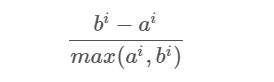

In [2]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/1_SAdv13fu4zgWRwRvGBrIWQ.png')

The coefficient can take values in the interval [-1, 1].

- If it is 0 –> the sample is very close to the neighboring clusters.
- It it is 1 –> the sample is far away from the neighboring clusters.
- It it is -1 –> the sample is assigned to the wrong clusters.

Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters. We’ll use here geyser dataset again because its cheaper to run the silhouette analysis and it is actually obvious that there is most likely only two groups of data points.

**Below are the main takeaways:**
- Scale/standardize the data when applying kmeans algorithm.
- Elbow method in selecting number of clusters doesn’t usually work because the error function is monotonically decreasing for all ks.
- Kmeans gives more weight to the bigger clusters.
- Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn’t work well when clusters are in different shapes such as elliptical clusters.
- If there is overlapping between clusters, kmeans doesn’t have an intrinsic measure for uncertainty

- For the examples belong to the overlapping region in order to determine for which cluster to assign each data point.Kmeans may still cluster the data even if it can’t be clustered such as data that comes from uniform distributions.

### Let's do one example:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('faithful.csv',usecols=[1,2])

In [3]:
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [11]:
data.tail()

,eruptions,waiting
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46
271,4.467,74


In [12]:
data.shape

(272, 2)

In [13]:
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

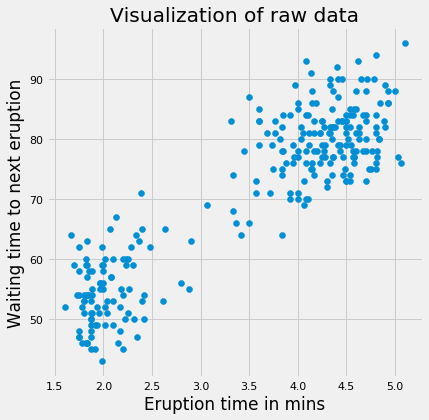

In [14]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [25]:
# Standardize the data
X = StandardScaler().fit_transform(data)

# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=100,)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
label=km.labels_

In [61]:
Centroids=km.cluster_centers_
Centroids=list(Centroids)
Centroids

[array([-1.26008539, -1.20156744]), array([0.70970327, 0.67674488])]

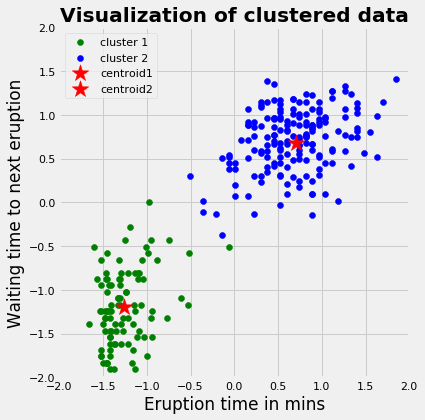

In [68]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X[label == 0, 0],X[label == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X[label == 1, 1],X[label == 1, 0],
            c='blue', label='cluster 2')
plt.scatter(Centroids[0][0],Centroids[0][1], marker='*', s=300,
            c='r', label='centroid1')
plt.scatter(Centroids[1][0],Centroids[1][1], marker='*', s=300,
            c='r', label='centroid2')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

Find the Optimal Cluster By using the elblow method:-

In [86]:
cluster_range=(1,10)
Ineria = list()
for i in cluster_range:
    km = KMeans(n_clusters=i, max_iter=100,)
    km.fit(X)
    ineria=km.inertia_
    Ineria.append(ineria)

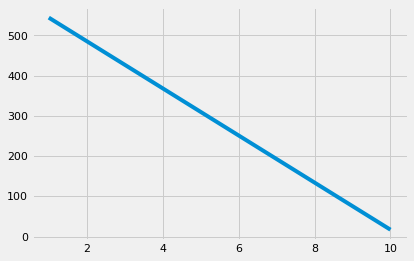

In [88]:
plt.plot(cluster_range,Ineria)
plt.show()

In this we will take 2.

In [89]:
score = silhouette_score(X,label)

In [90]:
score

0.7451774401207985

This is indicating that the cllustering has been done properly.

# Heirachical Clustering.
In the KMeans clustering,we provide first number of cluster that we required in order to get the Cluster.But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means. 

### What is Heirarchical Clustering:-

Let’s say we have the below points and we want to cluster them into groups:

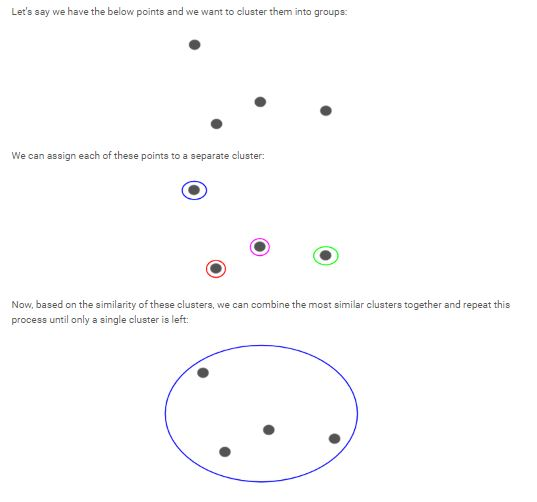

In [97]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

- We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. For now, let’s look at the different types of hierarchical clustering.

 

- Types of Hierarchical Clustering
There are mainly two types of hierarchical clustering:

- **Agglomerative hierarchical clustering**
- **Divisive Hierarchical clustering**

Let’s understand each type in detail.

 

**Agglomerative Hierarchical Clustering**

We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:

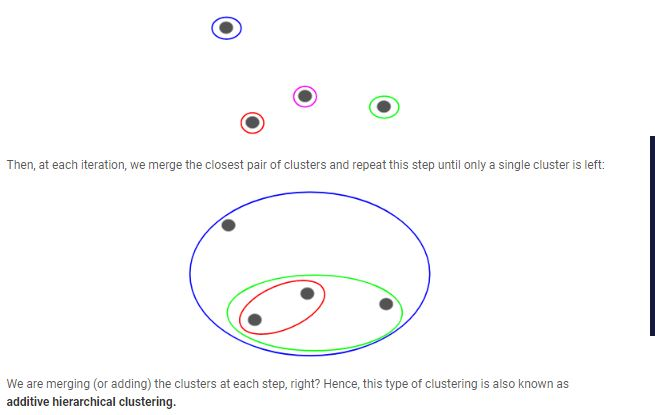

In [98]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

**Divisive Hierarchical Clustering**

Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster.

So, it doesn’t matter if we have 10 or 1000 data points. All these points will belong to the same cluster at the beginning:**

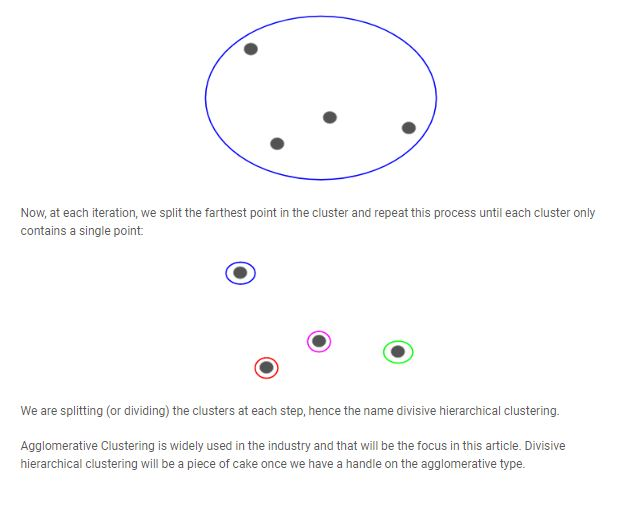

In [100]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

### How should we Choose the Number of Clusters in Hierarchical Clustering?

- To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a Dendrogram.
- A dendrogram is a tree-like diagram that records the sequences of merges or splits.

- We can clearly visualize the steps of hierarchical clustering. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

- Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). Let’s set this threshold as 12 and draw a horizontal line:

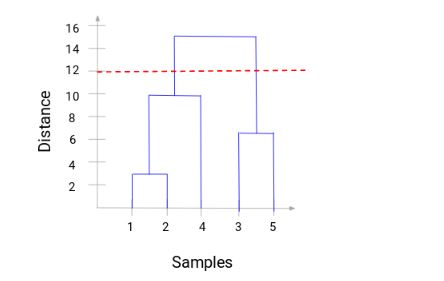

In [101]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters. One cluster will have a sample (1,2,4) and the other will have a sample (3,5). Pretty straightforward, right?

This is how we can decide the number of clusters using a dendrogram in Hierarchical Clustering.

## Agglomerative Clsutering Method.

- We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. Agglomerative is the bottom up approach which is more popular than Divisive clustering.

- We will also be using Complete Linkage as the Linkage Criteria.

- The Agglomerative Clustering class will require two inputs:

**n_clusters:-** The number of clusters to form as well as the number of centroids to generate.

**linkage:-** Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
Value will be: 'complete'
- Note: It is recommended that try everything with 'average' as well

In [5]:
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
agglo = AgglomerativeClustering(n_clusters=2,linkage='complete')

In [11]:
agglo.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [12]:
label=agglo.labels_

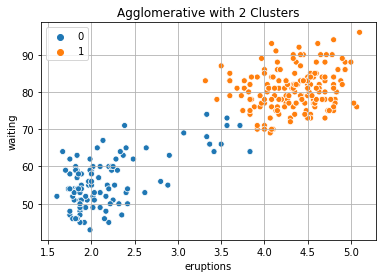

In [21]:
sns.scatterplot('eruptions','waiting',hue=label,data=data)
plt.title('Agglomerative with 2 Clusters')
plt.grid()
plt.show()

## Dendrogram Associated for the Agglomerative Hierarchical Clustering.

- Remember that a distance matrix contains the distance from each point to every other point of a dataset .We can use the function distance_matrix, which requires two inputs. Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.

In [22]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [25]:
dist = distance_matrix(X,X)

- Using the linkage class from hierarchy, pass in the parameters:

- The distance matrix
- 'complete' for complete linkage

In [26]:
Z = hierarchy.linkage(dist, 'complete')

- A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering

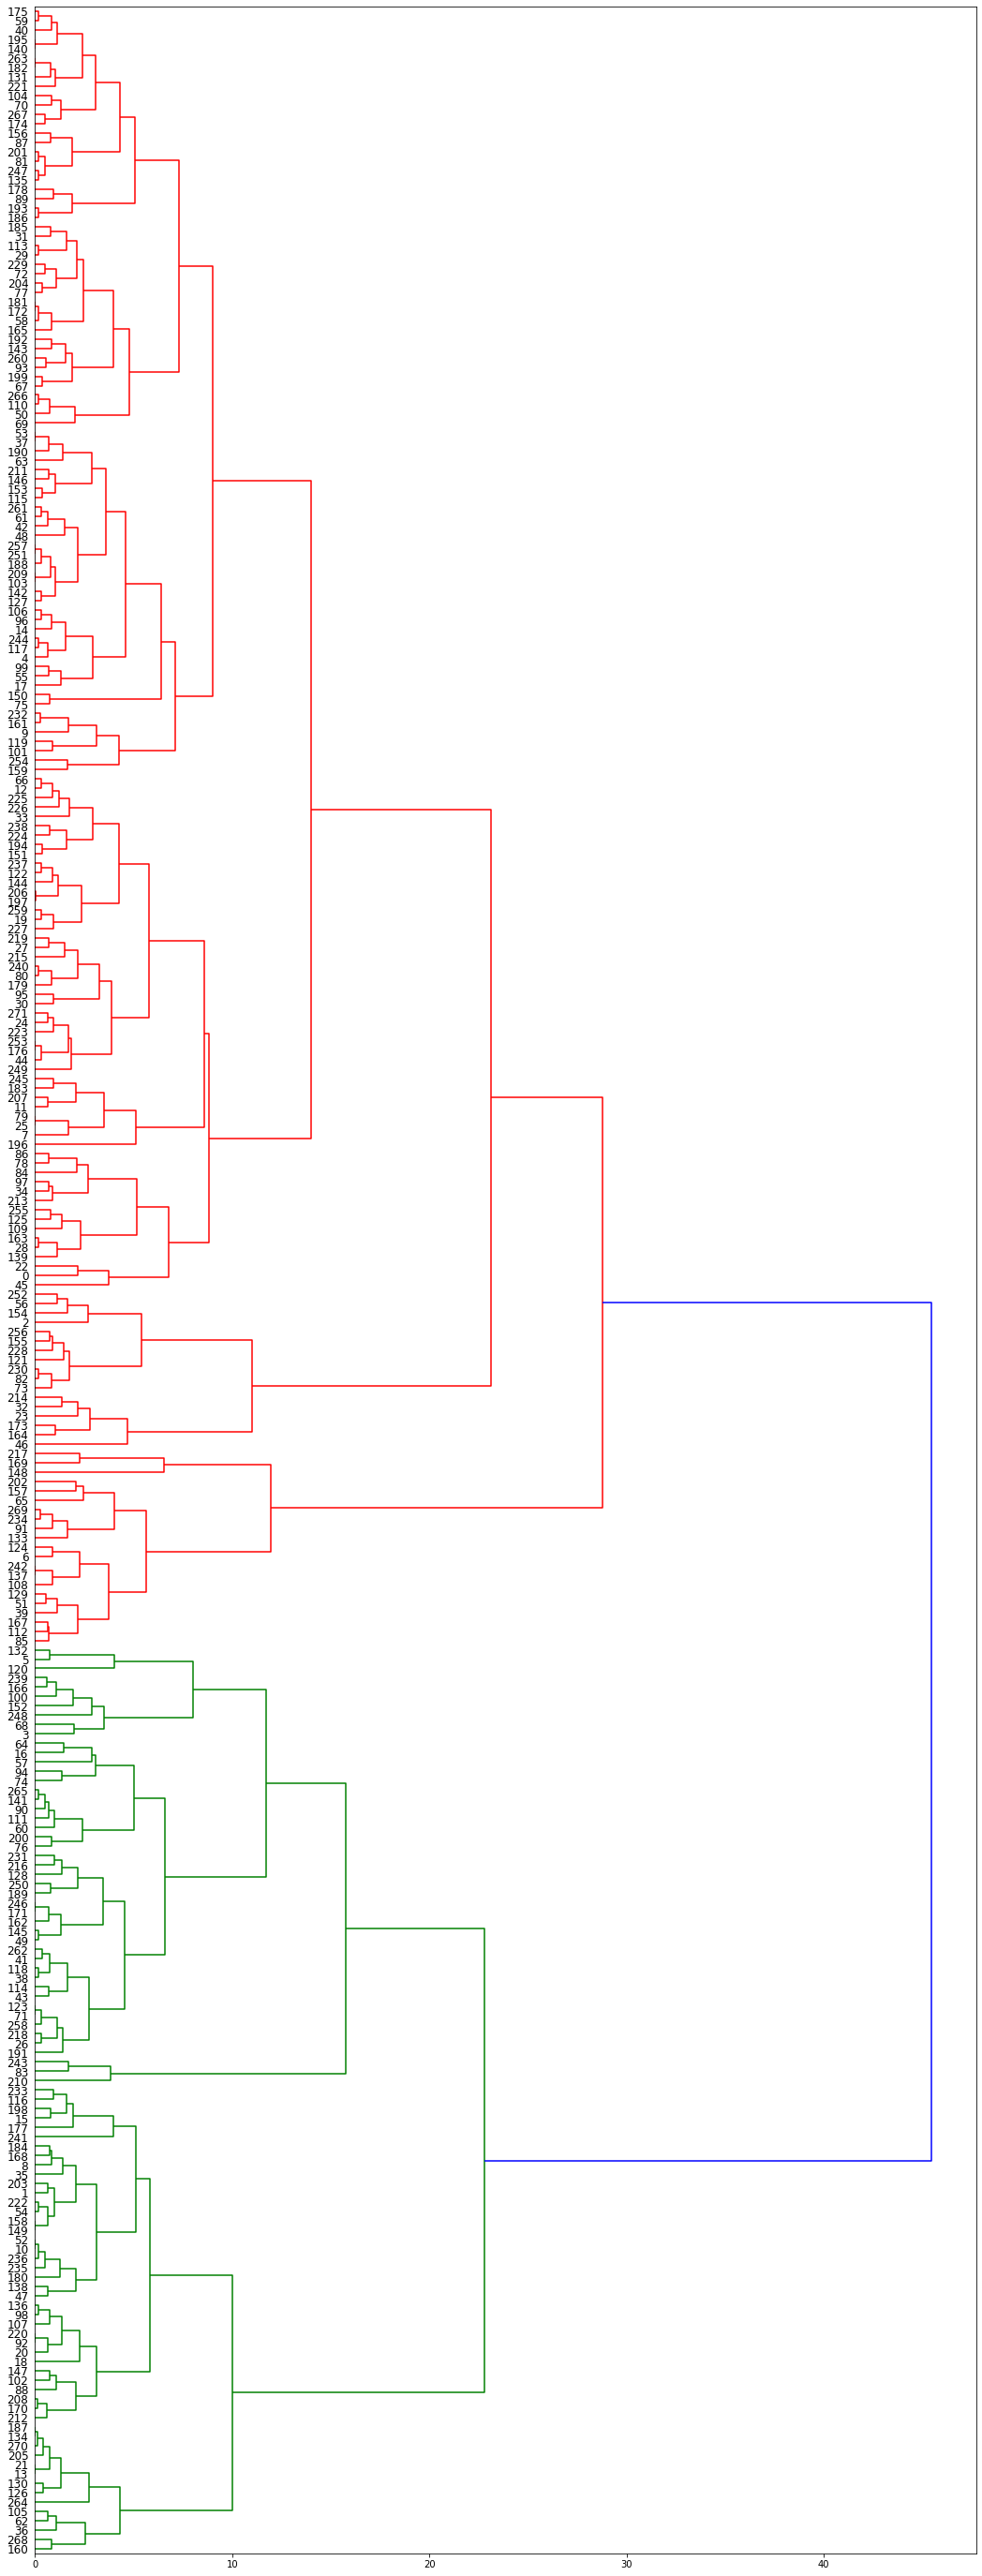

In [28]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

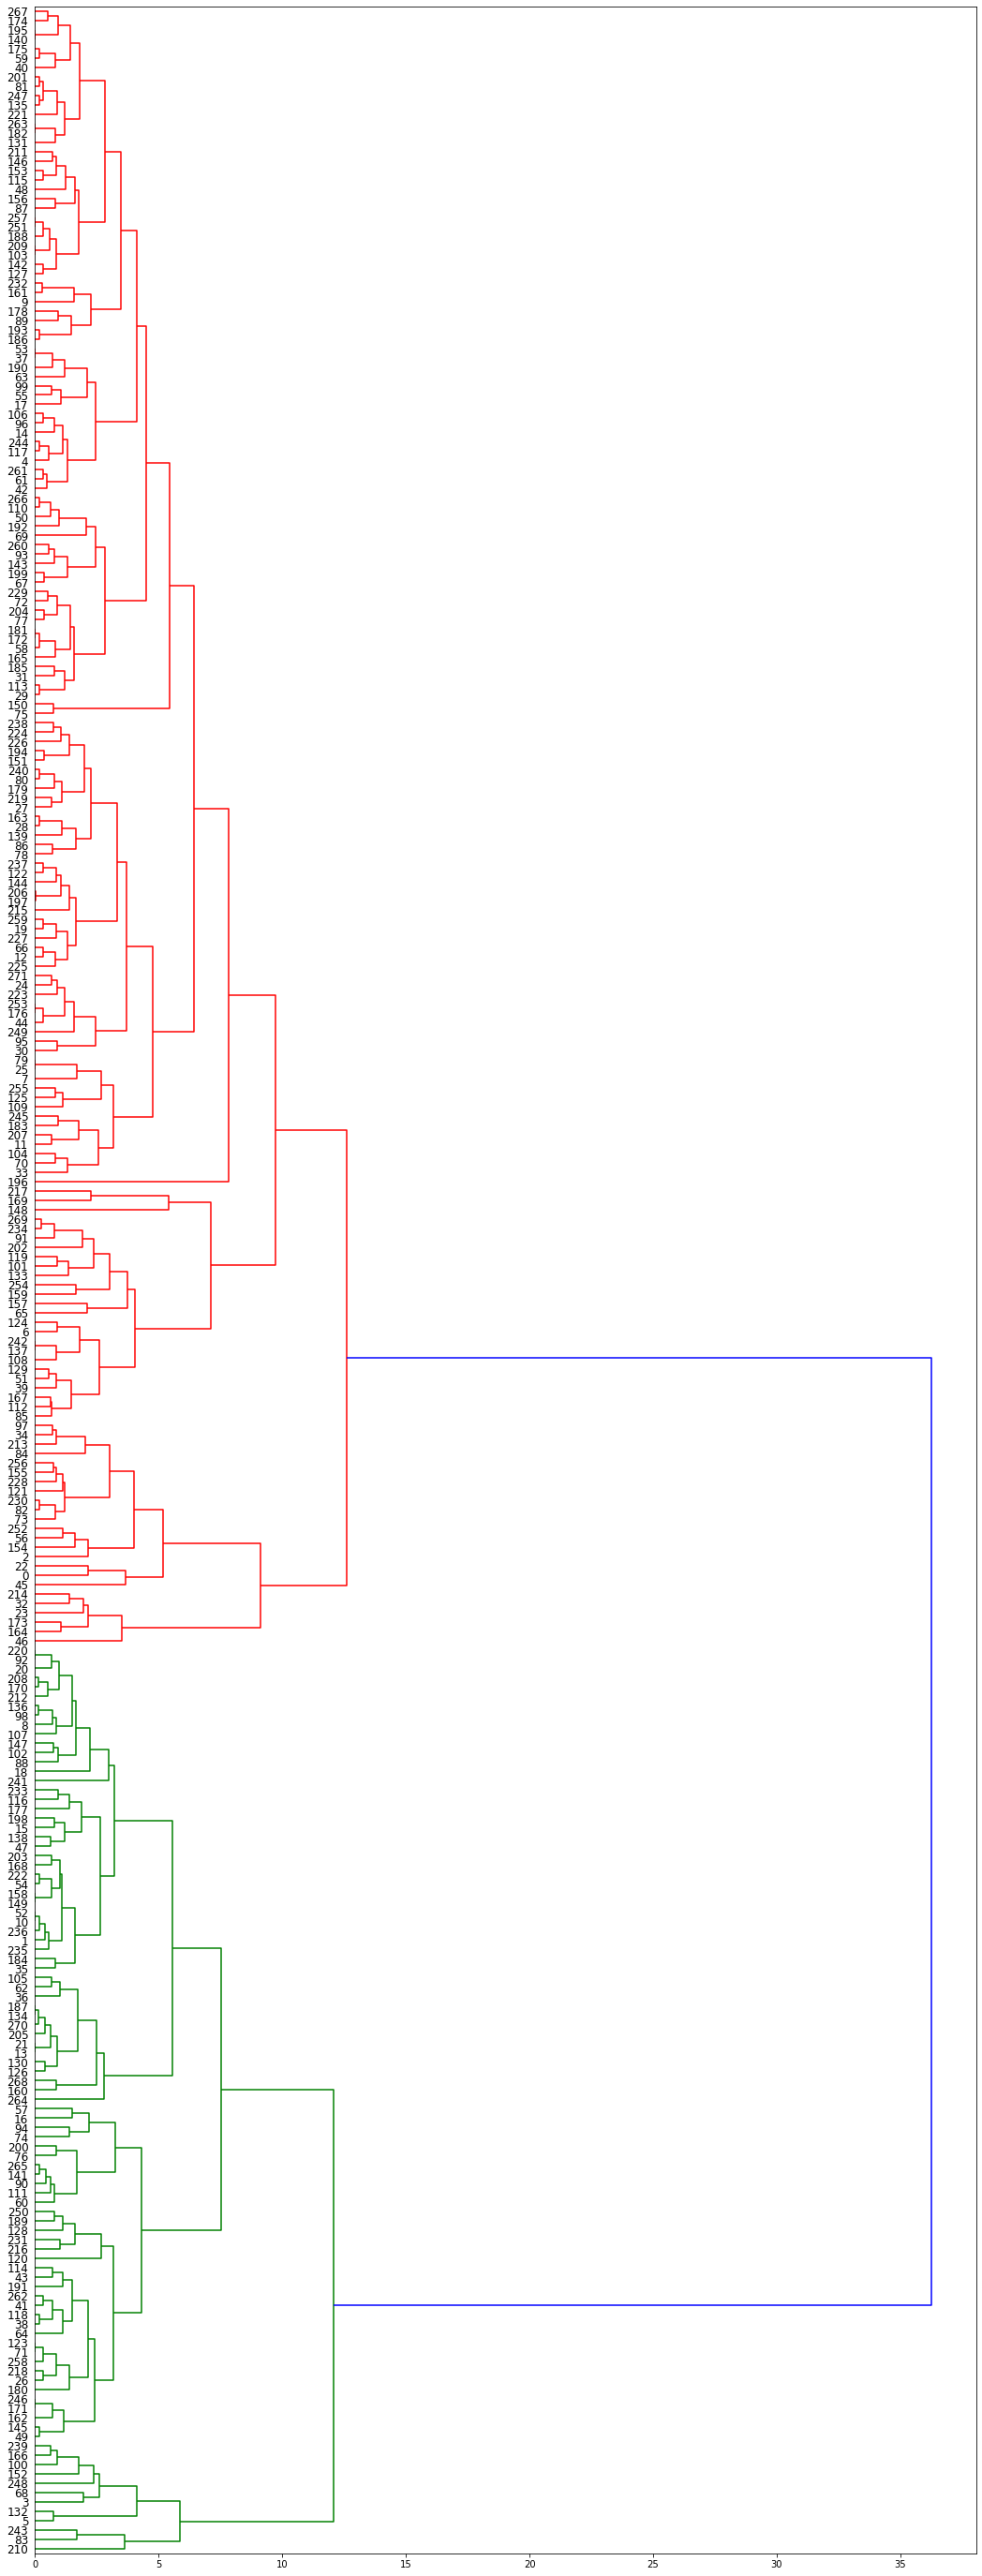

In [33]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In the dendogram bigger the distance that means bigger the disimilarity between those features.
Since if we see here,green and red defining itself they are diffrent to each other.

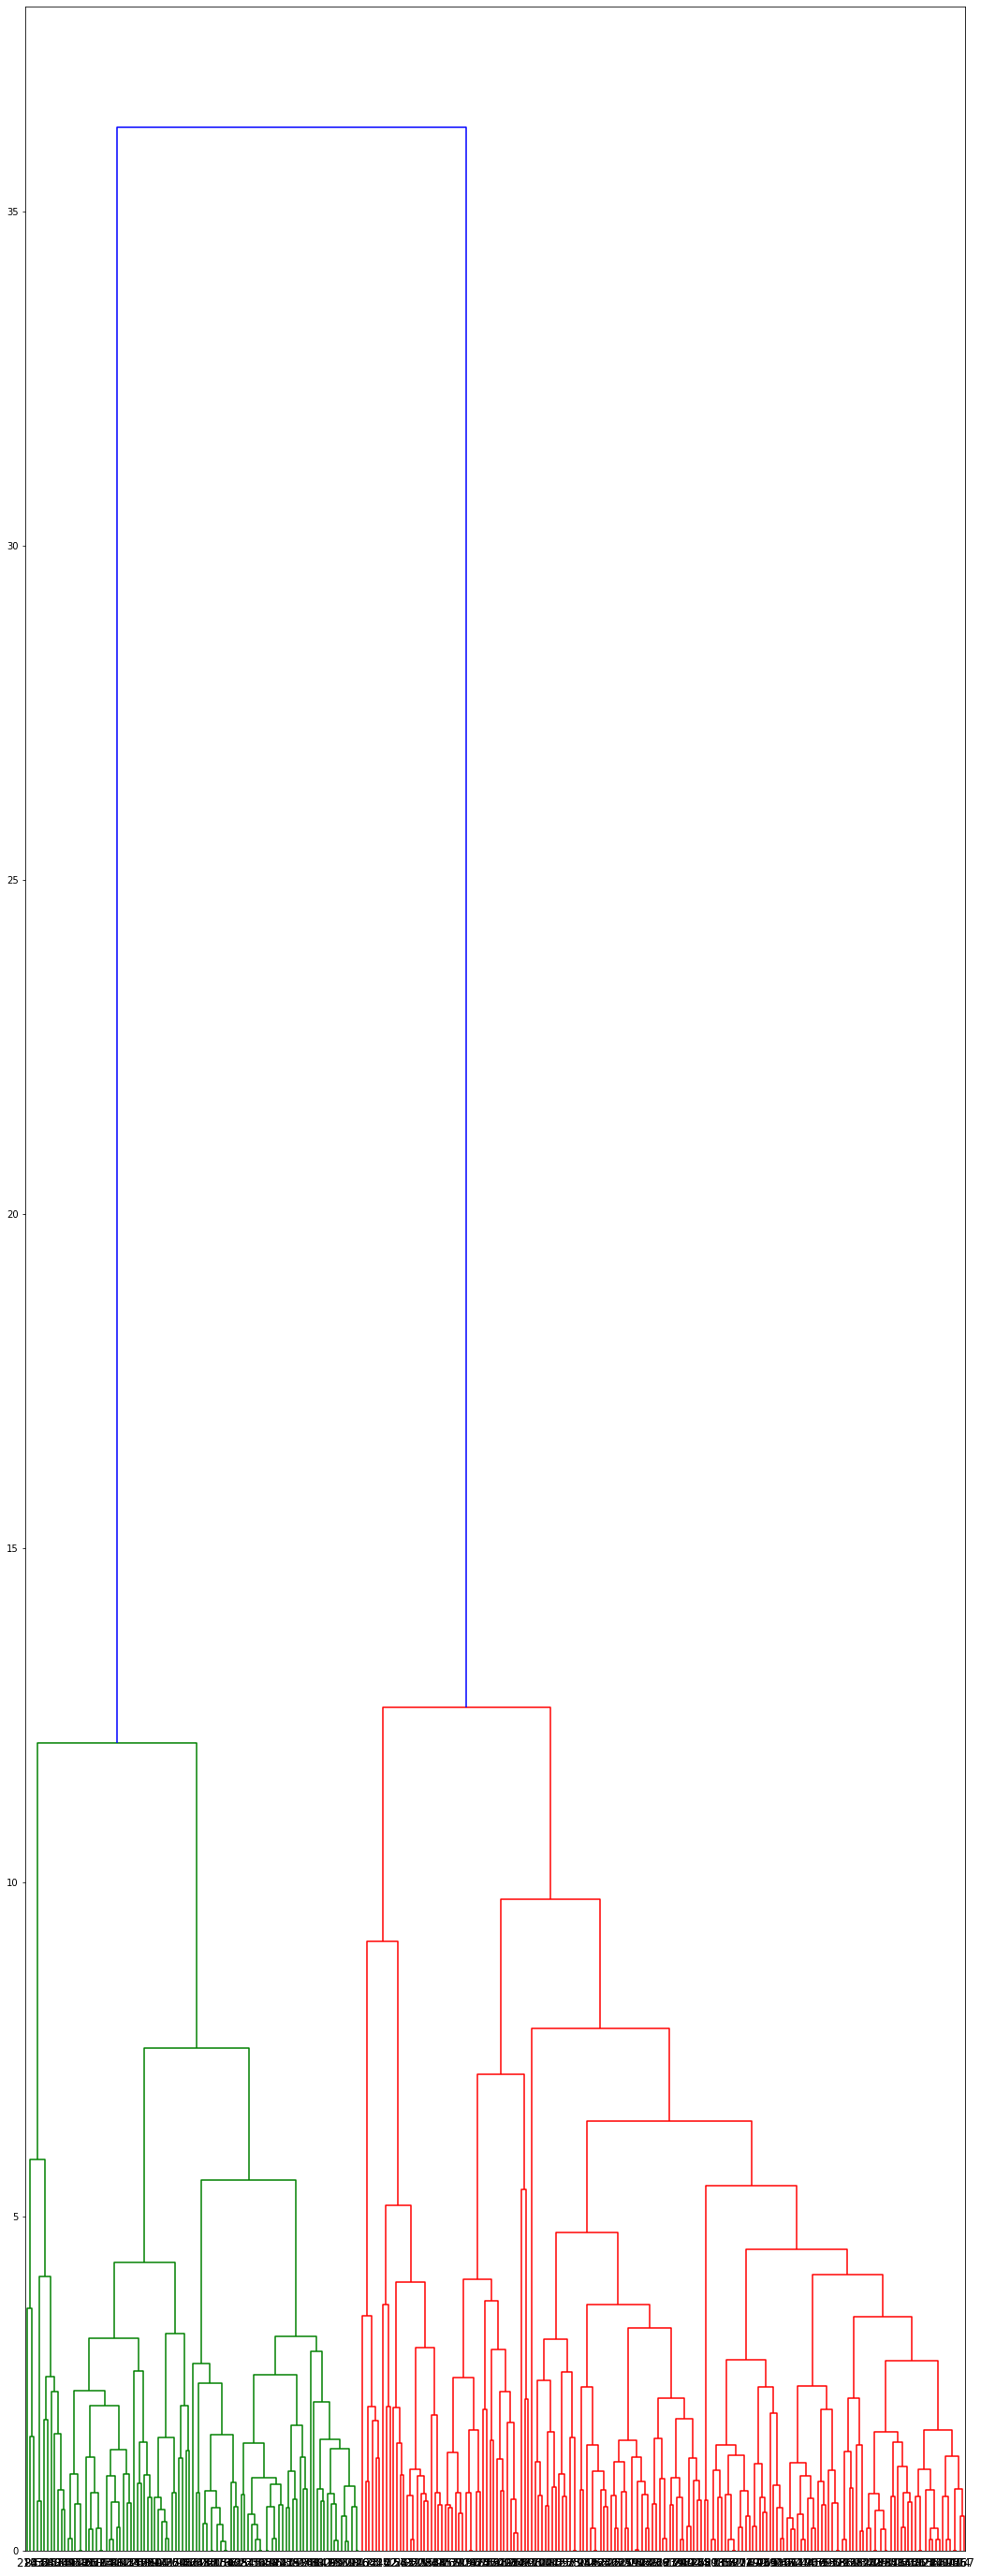

In [34]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')

Here,the upward line showing the disimilariries in between the features.
If the line is bigger that means the feature having the huge amount of dissimilarities voice versa.

## How to indentiy how many clusters we can make over here ?

- In the this heirarchical dendogram we will draw the line at which we will get the higher dissimilarities upwards lines.
- Here in this case we have the two lines which are moving upward by the long distance.This distance is showing that they are pretty much dissimilar to each other.Since we will draw the straight line and manupulate the how many lines has been crossed by that horizontal lines.
- In this case we having the only 2 lines are being crossed.

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
score = silhouette_score(X,label)

In [37]:
score

0.7178851898628533

That means we have got our optiimal number of cluster.

# Density Based Clustering (DBSCAN).

- Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.
- Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

#### Parameters:
- The DBSCAN algorithm basically requires 2 parameters:
- **eps:** specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.It is the radial distance from the one data point.If any data point comes under that radial distance that means the that points are similar to each other.
- **minPoints:** the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

#### Parameter estimation:
- The parameter estimation is a problem for every data mining task. To choose good parameters we need to understand how they are used and have at least a basic previous knowledge about the data set that will be used.
- **eps:** if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.
- **minPoints:** As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.

#### Why should we use DBSCAN?
- The DBSCAN algorithm should be used to find associations and structures in data that are hard to find manually but that can be relevant and useful to find patterns and predict trends.
- Clustering methods are usually used in biology, medicine, social sciences, archaeology, marketing, characters recognition, management systems and so on.
- Let’s think in a practical use of DBSCAN. Suppose we have an e-commerce and we want to improve our sales by recommending relevant products to our customers. We don’t know exactly what our customers are looking for but based on a data set we can predict and recommend a relevant product to a specific customer. We can apply the DBSCAN to our data set (based on the e-commerce database) and find clusters based on the products that the users have bought. Using this clusters we can find similarities between customers, for example, the customer A have bought 1 pen, 1 book and 1 scissors and the customer B have bought 1 book and 1 scissors, then we can recommend 1 pen to the customer B. This is just a little example of use of DBSCAN, but it can be used in a lot of applications in several areas.

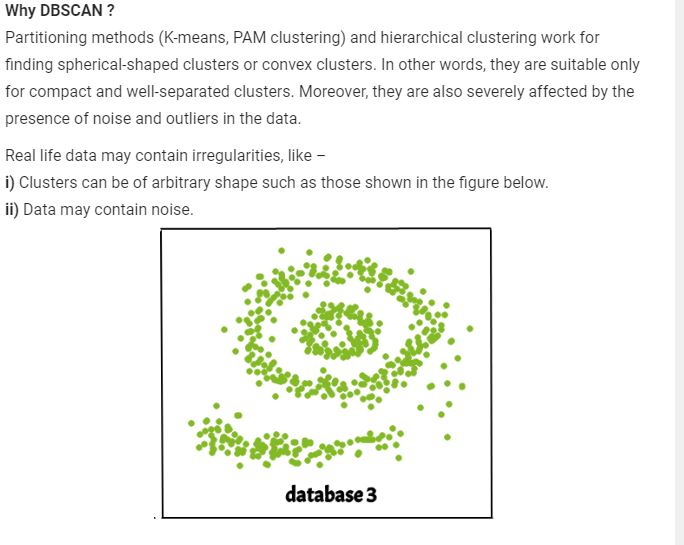

In [38]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

The figure below shows a data set containing nonconvex clusters and outliers/noises. Given such data, k-means algorithm has difficulties for identifying these clusters with arbitrary shapes.

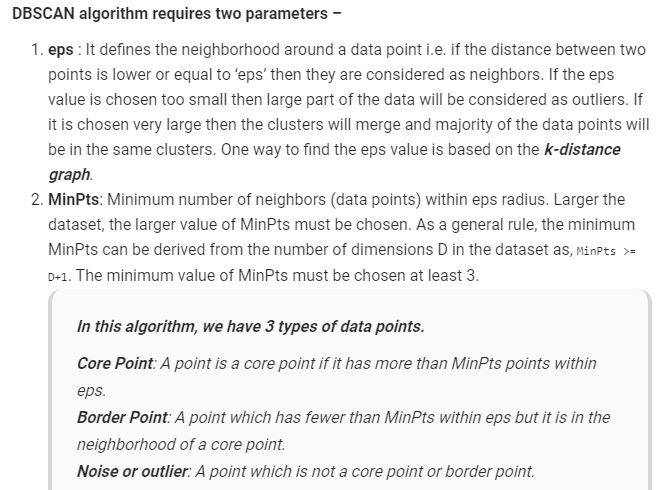

In [39]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

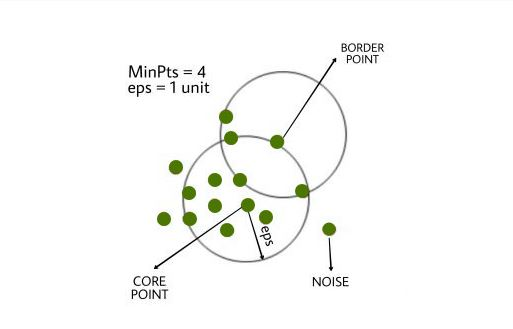

In [41]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

#### DBSCAN algorithm can be abstracted in the following steps –

- Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
- For each core point if it is not already assigned to a cluster, create a new cluster.
- Find recursively all its density connected points and assign them to the same cluster as the core point.
- A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.
- Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

#### Disadvantages of the DBSCAN

- K-Means forms spherical clusters only. This algorithm fails when data is not spherical ( i.e. same variance in all directions).
- K-Means algorithm is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.
- K-Means algorithm requires one to specify the number of clusters a priory etc.

**Basically, DBSCAN algorithm overcomes all the above-mentioned drawbacks of K-Means algorithm. DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.**

In [60]:
from sklearn.cluster import DBSCAN

In [75]:
db = DBSCAN(eps=0.7,min_samples=45)

In [76]:
db.fit(X)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=45, n_jobs=None, p=None)

In [77]:
label = db.labels_
label

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [78]:
data.columns

Index(['eruptions', 'waiting'], dtype='object')

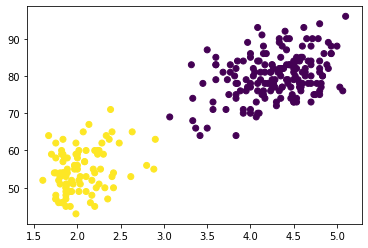

In [79]:
plt.scatter(data['eruptions'],data['waiting'],c=label)
plt.show()

In [80]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,label)

In [81]:
score

0.7460024896699414

In [85]:
label

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [82]:
db.core_sample_indices_

array([  0,   1,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,
        29,  30,  31,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 153, 155, 156,
       158, 159, 160, 161, 162, 163, 165, 167, 168, 170, 171, 172, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 20

In [83]:
sample_core = np.zeros_like(label,dtype=bool)

In [87]:
Outliers=sample_core[db.core_sample_indices_]=True

In [95]:
n_cluster = len(set(label))-(1 if -1 in label else 0)

In [96]:
n_cluster

2

**Drabacks**

It does not deal varing density.It struggle high dimensioanal data.If the data having the too many dimensions,DBSCAN suffer.

- We can find the optimal values of the eps and mimimum sample by using **GridSearchCV**,**RandomziedSerachCV**

# Mean Shift Algorithm.

- MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

- The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

- Mean shift algorithm is basically work on the KDE(Kernel Density Estimation).KDE is the wight function It assign the weight or prority to each data point.
- We follow the any ditribution normaly we follow the gaussian distribution.

- Meanshift is falling under the category of a clustering algorithm in contrast of Unsupervised learning that assigns the data points to the clusters iteratively by shifting points towards the mode (mode is the highest density of data points in the region, in the context of the Meanshift). As such, it is also known as the Mode-seeking algorithm. Mean-shift algorithm has applications in the field of image processing and computer vision.

- Given a set of data points, the algorithm iteratively assigns each data point towards the closest cluster centroid and direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster.

- Unlike the popular K-Means cluster algorithm, mean-shift does not require specifying the number of clusters in advance. The number of clusters is determined by the algorithm with respect to the data.

- Note: The downside to Mean Shift is that it is computationally expensive O(n²).

#### Kernel Density Estimation –
- The first step when applying mean shift clustering algorithms is representing your data in a mathematical manner this means representing your data as points such as the set below.

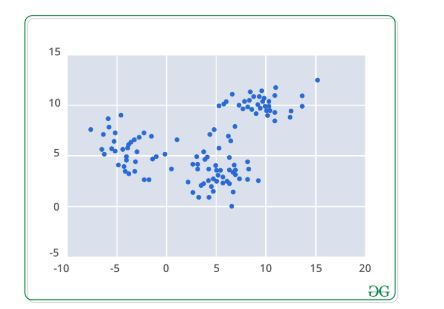

In [97]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

- Mean-shift builds upon the concept of kernel density estimation is sort KDE. Imagine that the above data was sampled from a probability distribution. KDE is a method to estimate the underlying distribution also called the probability density function for a set of data.

- It works by placing a kernel on each point in the data set. A kernel is a fancy mathematical word for a weighting function generally used in convolution. There are many different types of kernels, but the most popular one is the Gaussian kernel. Adding up all of the individual kernels generates a probability surface example density function. Depending on the kernel bandwidth parameter used, the resultant density function will vary.

- Below is the KDE surface for our points above using a Gaussian kernel with a kernel bandwidth of 2.

**Surface plot:**

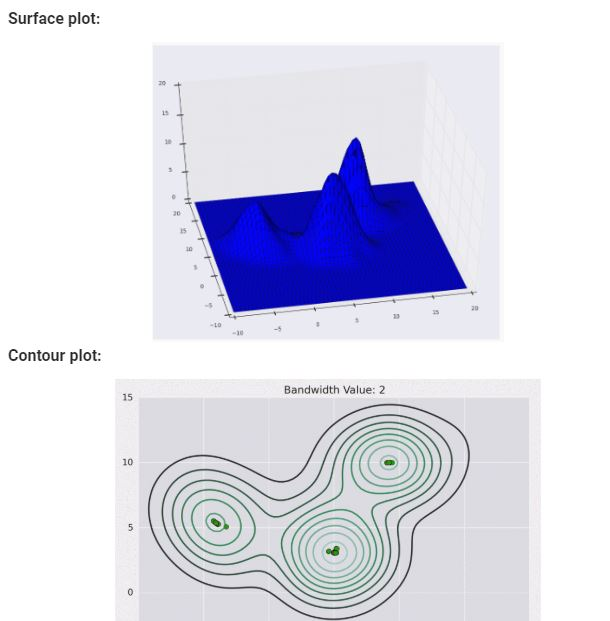

In [98]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

## Lets Do with Mean-Shift Algorithm.

In [4]:
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [7]:
from sklearn.cluster import MeanShift,estimate_bandwidth

In [37]:
bandwidth = estimate_bandwidth(X,0.3)

In [38]:
bandwidth

0.7169845258357378

In [39]:
ms = MeanShift(bandwidth=bandwidth)

In [40]:
ms.fit(X)  #Slow as compare to Kmeans clustering.

MeanShift(bandwidth=0.7169845258357378, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [41]:
label = ms.labels_
label

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [43]:
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


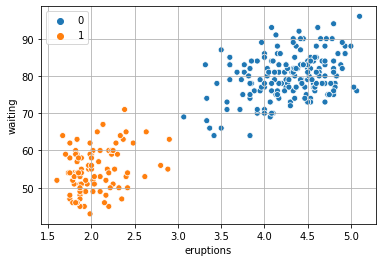

In [45]:
sns.scatterplot(data.eruptions,data.waiting,hue=label)
plt.grid()
plt.show()

#### Mesurement Of Scores:-

In [48]:
score = silhouette_score(X,label)
score

0.7460024896699414

# Thank You !!